In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

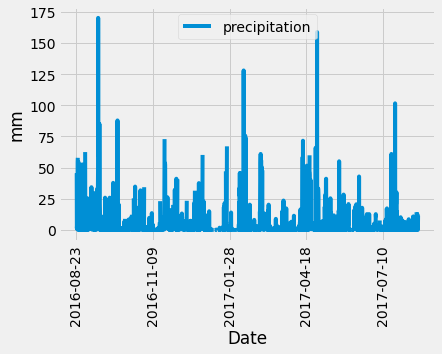

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_b4 = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores of the previous 12 months
prev_12_mths = session.query(Measurement.date, Measurement.prcp).\
    filter((Measurement.date >= one_year_b4) & (Measurement.date <= "2017-08-23")).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prev_12_mths,columns=["date","precipitation"])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_values(by='date', ascending = True, inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)
plt.ylabel("mm")
plt.xlabel("Date")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df["precipitation"].describe()

count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").group_by(Measurement.station).all()

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

In [16]:
# Find the most recent date in the data set for this station
session.query(Measurement.date).\
    filter(Measurement.station=="USC00519281").order_by(Measurement.date.desc()).first()

('2017-08-18')

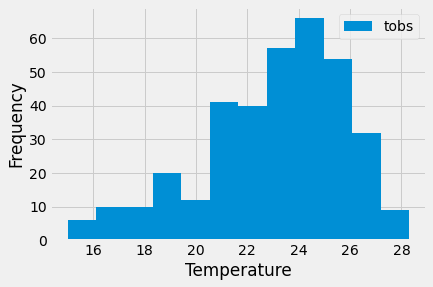

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date one year from the last date in data set.
one_year_b4 = dt.date(2017, 8, 18) - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for this station
most_active_prev_12 = session.query(Measurement.tobs).\
    filter(Measurement.station=="USC00519281").\
        filter((Measurement.date >= one_year_b4) & (Measurement.date <= "2017-08-18")).all()

# Save the query results as a Pandas DataFrame and plot as a histogram
most_active_df = pd.DataFrame(most_active_prev_12,columns=["tobs"])
most_active_df.plot(kind='hist',bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

# Close session

In [18]:
# Close Session
session.close()